In [1]:
import numpy as np
from optimizers.optimizers_xy import *
from optimizers.optimizers_conv_conc import *
from optimizers.optimizers_conc_conv import *
from plot import *

## SECTION 1

In this part, we propose three simple example of how changing the optimization algorithm change the convergence of the optimization problems $min_{x\in\mathbb{R^m}}f(x,y)$, $min_{y\in\mathbb{R^m}}g(x,y)$. Many problems in competitive optimization, including GANs, have the form $f(x,y)=\mathbb{\phi}(\mathcal{G}(x),\mathcal{D}(y))$, $f(x,y)=\mathbb{\theta}(\mathcal{G}(x),\mathcal{D}(y))$. We will explore different modification of Gradient Descent that take into account some additional terms. These new terms refers in some way to competition, consensus and equilibrium (we will describe them further in this section).

#### PROBLEM 1
We firstly consider the problem $$min_{x\in\mathbb{R^m}}f(x,y)$$  $$min_{y\in\mathbb{R^m}}(-f(x,y))$$  
In this first case, we take $f(x,y)=xy$

#### 1) Gradient Descent

In [2]:
initial_x = 0.5
initial_y = 0.5
max_iters = 50
gamma = 0.2
objectives_GD, xs_GD, ys_GD = gradient_descent_xy(initial_x, initial_y, max_iters, gamma)

Gradient Descent(0/49): objective=0.25
Gradient Descent(1/49): objective=0.24
Gradient Descent(2/49): objective=0.1904
Gradient Descent(3/49): objective=0.10598400000000004
Gradient Descent(4/49): objective=-0.002447359999999964
Gradient Descent(5/49): objective=-0.11933122559999998
Gradient Descent(6/49): objective=-0.226468888576
Gradient Descent(7/49): objective=-0.30575161245696003
Gradient Descent(8/49): objective=-0.3420943460335616
Gradient Descent(9/49): objective=-0.3261202003509903
Gradient Descent(10/49): objective=-0.2561415400040012
Gradient Descent(11/49): objective=-0.13906014810805115
Gradient Descent(12/49): objective=0.010047205300869477
Gradient Descent(13/49): objective=0.1696980903713375
Gradient Descent(14/49): objective=0.3149532762595476
Gradient Descent(15/49): objective=0.42116483587269277
Gradient Descent(16/49): objective=0.46798302127324337
Gradient Descent(17/49): objective=0.4429955143647228
Gradient Descent(18/49): objective=0.3443809517711277
Gradient D

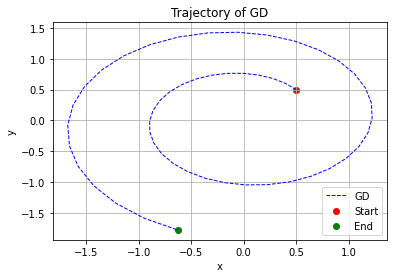

In [3]:
plt.figure()
plt.grid()
plt.plot(xs_GD, ys_GD, 'b--', linewidth=1, label="GD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectory of GD")
plt.legend()
# Add markers for the starting and end points
plt.scatter(xs_GD[0], ys_GD[0], c='r', marker='o', label='Start')
plt.scatter(xs_GD[-1], ys_GD[-1], c='g', marker='o', label='End')
plt.legend()

plt.show()

It is clear that GD fail to converge in this problem.

#### 2) LCGD

In [4]:
initial_x = 0.5
initial_y = 0.5
max_iters = 50
gamma = 0.2
eta = 0.2
objectives_LCGD, xs_LCGD, ys_LCGD = LCGD_xy(initial_x, initial_y, max_iters, gamma, eta)

LCGD(0/49): objective=0.25
LCGD(1/49): objective=0.15000000000000002
LCGD(2/49): objective=0.06440000000000001
LCGD(3/49): objective=0.007919999999999995
LCGD(4/49): objective=-0.020274560000000018
LCGD(5/49): objective=-0.02799168000000002
LCGD(6/49): objective=-0.024215059456000013
LCGD(7/49): objective=-0.016114718515200008
LCGD(8/49): objective=-0.008140618725785604
LCGD(9/49): objective=-0.002317296629514241
LCGD(10/49): objective=0.0009834661433861744
LCGD(11/49): objective=0.0022516773335507943
LCGD(12/49): objective=0.0022472580555591855
LCGD(13/49): objective=0.0016555340676371359
LCGD(14/49): objective=0.0009475087562739957
LCGD(15/49): objective=0.00037149155465338306
LCGD(16/49): objective=7.66181668296409e-06
LCGD(17/49): objective=-0.00016258351485216744
LCGD(18/49): objective=-0.00019864304185680348
LCGD(19/49): objective=-0.00016319303296052193
LCGD(20/49): objective=-0.00010397909699804038
LCGD(21/49): objective=-4.931445795670312e-05
LCGD(22/49): objective=-1.10974150

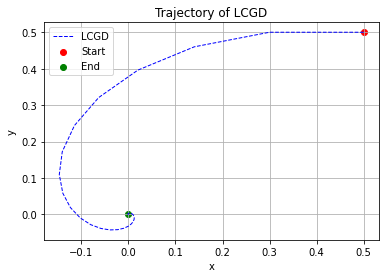

In [5]:
plt.figure()
plt.grid()
plt.plot(xs_LCGD, ys_LCGD, 'b--', linewidth=1, label="LCGD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectory of LCGD")
plt.legend()
# Add markers for the starting and end points
plt.scatter(xs_LCGD[0], ys_LCGD[0], c='r', marker='o', label='Start')
plt.scatter(xs_LCGD[-1], ys_LCGD[-1], c='g', marker='o', label='End')
plt.legend()

plt.show()

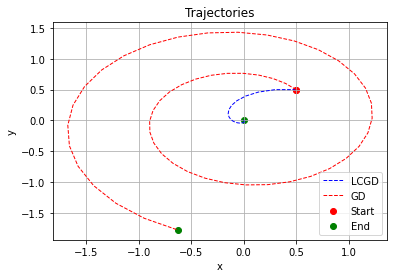

In [6]:
plt.figure()
plt.grid()
plt.plot(xs_LCGD, ys_LCGD, 'b--', linewidth=1, label="LCGD")
plt.plot(xs_GD, ys_GD, 'r--', linewidth=1, label="GD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectories")
plt.legend()
# Add markers for the starting and end points
plt.scatter([xs_LCGD[0],xs_GD[0]], [ys_LCGD[0],ys_GD[0]], c='r', marker='o', label='Start')
plt.scatter([xs_LCGD[-1],xs_GD[-1]], [ys_LCGD[-1],ys_GD[-1]], c='g', marker='o', label='End')
plt.legend()

plt.show()

In [7]:
initial_x = 0.5
initial_y = 0.5
max_iters = 50
gamma = 0.2
eta = 0.2
objectives_CGD, xs_CGD, ys_CGD = CGD_xy(initial_x, initial_y, max_iters, gamma, eta)

Competitive Gradient Descent(0/49): objective=0.25
Competitive Gradient Descent(1/49): objective=0.16666666666666666
Competitive Gradient Descent(2/49): objective=0.09182098765432097
Competitive Gradient Descent(3/49): objective=0.035493827160493804
Competitive Gradient Descent(4/49): objective=-0.0005691777168114898
Competitive Gradient Descent(5/49): objective=-0.0192726591474877
Competitive Gradient Descent(6/49): objective=-0.0253999929554739
Competitive Gradient Descent(7/49): objective=-0.023813943089010196
Competitive Gradient Descent(8/49): objective=-0.018503162361041093
Competitive Gradient Descent(9/49): objective=-0.012249412833108115
Competitive Gradient Descent(10/49): objective=-0.00668120958298383
Competitive Gradient Descent(11/49): objective=-0.0025189252193016766
Competitive Gradient Descent(12/49): objective=0.000126384953043034
Competitive Gradient Descent(13/49): objective=0.0014823971042486849
Competitive Gradient Descent(14/49): objective=0.001910606456701108
Co

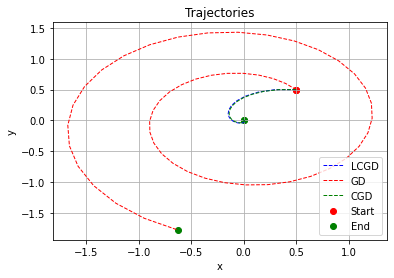

In [8]:
plt.figure()
plt.grid()
plt.plot(xs_LCGD, ys_LCGD, 'b--', linewidth=1, label="LCGD")
plt.plot(xs_GD, ys_GD, 'r--', linewidth=1, label="GD")
plt.plot(xs_CGD, ys_CGD, 'g--', linewidth=1, label="CGD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectories")
plt.legend()
# Add markers for the starting and end points
plt.scatter([xs_LCGD[0], xs_GD[0], xs_CGD[0]], [ys_LCGD[0], ys_GD[0], ys_CGD[0]], c='r', marker='o', label='Start')
plt.scatter([xs_LCGD[-1], xs_GD[-1], xs_CGD[-1]], [ys_LCGD[-1], ys_GD[-1], ys_CGD[-1]], c='g', marker='o', label='End')
plt.legend()

plt.show()

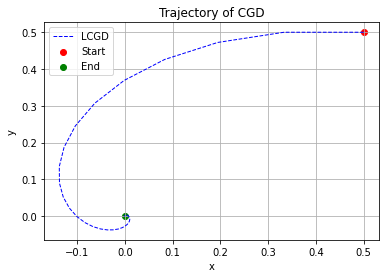

In [9]:
plt.figure()
plt.grid()
plt.plot(xs_CGD, ys_CGD, 'b--', linewidth=1, label="LCGD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectory of CGD")
plt.legend()
# Add markers for the starting and end points
plt.scatter(xs_CGD[0], ys_CGD[0], c='r', marker='o', label='Start')
plt.scatter(xs_CGD[-1], ys_CGD[-1], c='g', marker='o', label='End')
plt.legend()

plt.show()

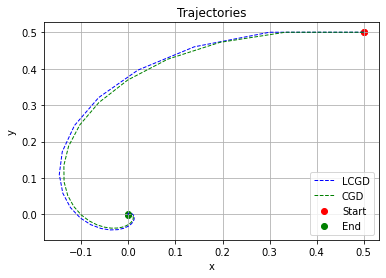

In [10]:
plt.figure()
plt.grid()
plt.plot(xs_LCGD, ys_LCGD, 'b--', linewidth=1, label="LCGD")
plt.plot(xs_CGD, ys_CGD, 'g--', linewidth=1, label="CGD")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectories")
plt.legend()
# Add markers for the starting and end points
plt.scatter([xs_LCGD[0], xs_CGD[0]], [ys_LCGD[0], ys_CGD[0]], c='r', marker='o', label='Start')
plt.scatter([xs_LCGD[-1], xs_CGD[-1]], [ys_LCGD[-1], ys_CGD[-1]], c='g', marker='o', label='End')
plt.legend()

plt.show()